# BAKE OFF

In [1]:
# import libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import numpy as np
import seaborn as sns


from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import make_scorer, accuracy_score

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#  is the credit given lower than statement balance

## 1. Data Cleaning

In [3]:
df = pd.read_csv('training_data.csv' , index_col=0)
pd.options.display.max_columns = 100
df.shape

(22500, 24)

In [4]:
df = df.rename(columns=
           {'X1': 'given_credit',
            'X2': 'gender',
            'X3': 'education',
            'X4': 'martial_status',
            'X5': 'age',
            'X6': 'past_status_sept',
            'X7': 'past_status_aug',
            'X8': 'past_status_jul',
            'X9': 'past_status_jun',
           'X10': 'past_status_may',
           'X11': 'past_status_apr',
           'X12': 'bill_sept',
           'X13': 'bill_aug',
           'X14': 'bill_jul',
           'X15': 'bill_jun',
           'X16': 'bill_may',
           'X17': 'bill_apr',
           'X18': 'paid_sept',
           'X19': 'paid_aug',
           'X20': 'paid_jul',
           'X21': 'paid_jun',
           'X22': 'paid_may',
           'X23': 'paid_apr',
             'Y': 'target'},
              inplace=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22500 entries, 28835 to 7624
Data columns (total 24 columns):
given_credit        22500 non-null object
gender              22500 non-null object
education           22500 non-null object
martial_status      22500 non-null object
age                 22500 non-null object
past_status_sept    22500 non-null object
past_status_aug     22500 non-null object
past_status_jul     22500 non-null object
past_status_jun     22500 non-null object
past_status_may     22500 non-null object
past_status_apr     22500 non-null object
bill_sept           22500 non-null object
bill_aug            22500 non-null object
bill_jul            22500 non-null object
bill_jun            22500 non-null object
bill_may            22500 non-null object
bill_apr            22500 non-null object
paid_sept           22500 non-null object
paid_aug            22500 non-null object
paid_jul            22500 non-null object
paid_jun            22500 non-null object
paid_may   

In [6]:
# change to float
df = df.apply(pd.to_numeric, errors='coerce')

In [7]:
# see if null is one row
df[df.isnull().any(axis=1)]

,given_credit,gender,education,martial_status,age,past_status_sept,past_status_aug,past_status_jul,past_status_jun,past_status_may,past_status_apr,bill_sept,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,paid_sept,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,target
ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# drop row
df.dropna(axis=0, inplace=True)

In [9]:
df.head()

,given_credit,gender,education,martial_status,age,past_status_sept,past_status_aug,past_status_jul,past_status_jun,past_status_may,past_status_apr,bill_sept,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,paid_sept,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,target
28835,220000.0,2.0,1.0,2.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,222598.0,222168.0,217900.0,221193.0,181859.0,184605.0,10000.0,8018.0,10121.0,6006.0,10987.0,143779.0,1.0
25329,200000.0,2.0,3.0,2.0,29.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,0.0
18894,180000.0,2.0,1.0,2.0,27.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
690,80000.0,1.0,2.0,2.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,51372.0,51872.0,47593.0,43882.0,42256.0,42527.0,1853.0,1700.0,1522.0,1548.0,1488.0,1500.0,0.0
6239,10000.0,1.0,2.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,8257.0,7995.0,4878.0,5444.0,2639.0,2697.0,2000.0,1100.0,600.0,300.0,300.0,1000.0,1.0


## 2. EDA

In [10]:
# df.hist(bins=10, figsize=(20,15))
# plt.show()

In [11]:
# can only have 1,2,3,4 == 4 is others
df.education.value_counts()

2.0    10516
1.0     7919
3.0     3713
5.0      208
4.0       90
6.0       42
0.0       11
Name: education, dtype: int64

In [12]:
df['education'] = df['education'].replace(0, 4)
df['education'] = df['education'].replace(5, 4)
df['education'] = df['education'].replace(6, 4)

In [13]:
df.gender.value_counts()

2.0    13572
1.0     8927
Name: gender, dtype: int64

In [14]:
df.martial_status.value_counts()

2.0    12026
1.0    10195
3.0      234
0.0       44
Name: martial_status, dtype: int64

In [15]:
df['martial_status'] = df['martial_status'].replace(0, 3)

In [16]:
columns = list(df.columns)
columns.remove('gender')
columns.remove('education')
columns.remove('martial_status')
columns.remove('target')

columns

['given_credit',
 'age',
 'past_status_sept',
 'past_status_aug',
 'past_status_jul',
 'past_status_jun',
 'past_status_may',
 'past_status_apr',
 'bill_sept',
 'bill_aug',
 'bill_jul',
 'bill_jun',
 'bill_may',
 'bill_apr',
 'paid_sept',
 'paid_aug',
 'paid_jul',
 'paid_jun',
 'paid_may',
 'paid_apr']

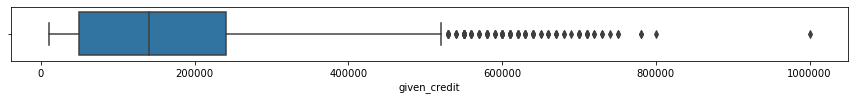

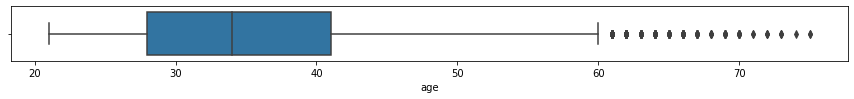

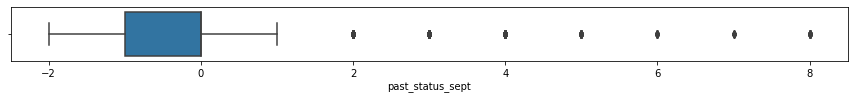

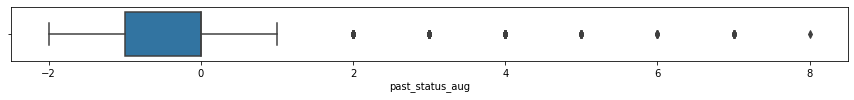

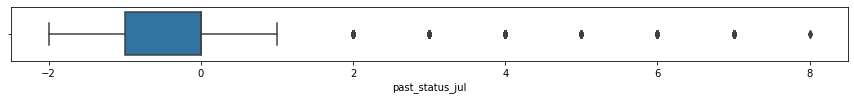

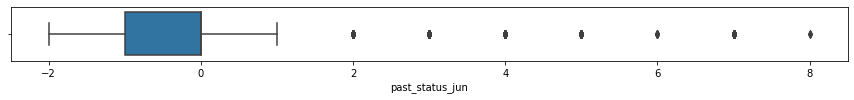

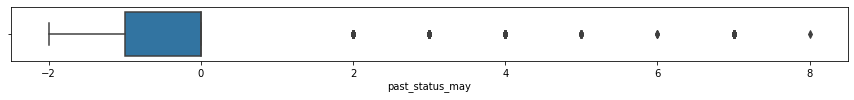

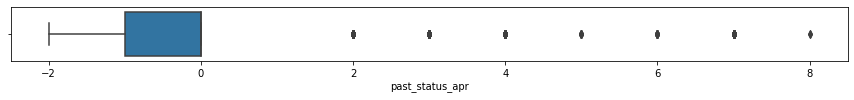

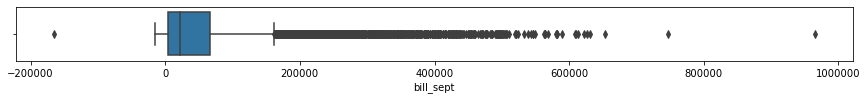

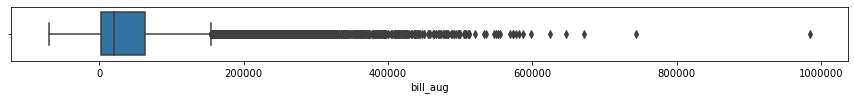

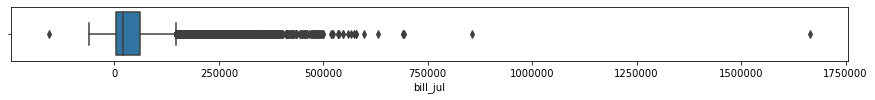

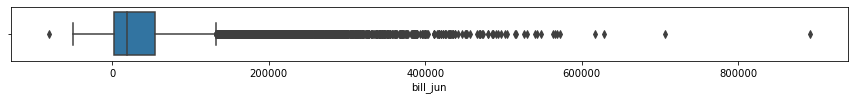

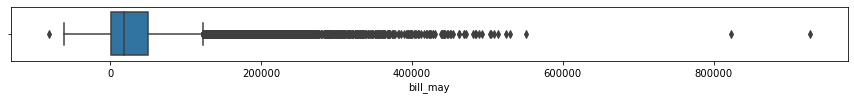

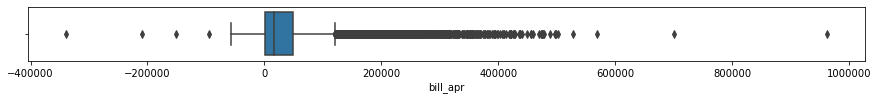

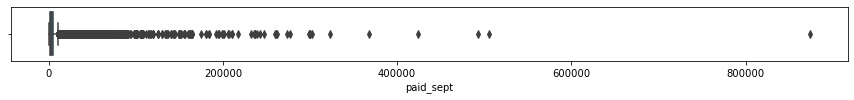

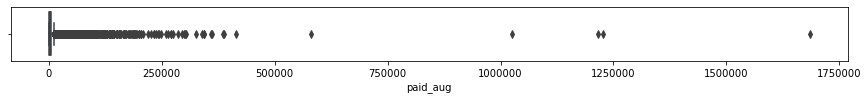

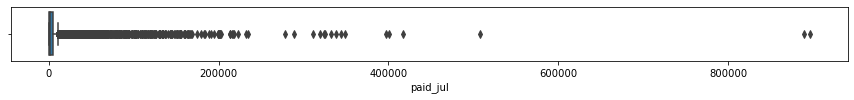

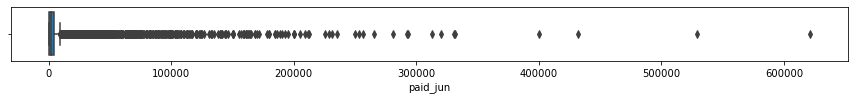

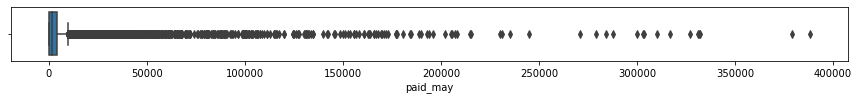

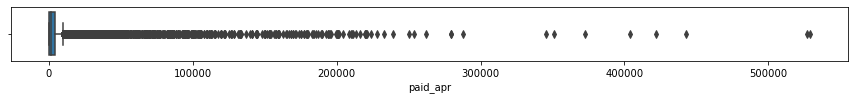

In [17]:
for item in columns:
#      sns.set(rc={'figure.figsize':(15,0.5)});
    plt.figure(figsize=(15,1))
    sns.boxplot(data=df, x=item);

In [18]:
# lowered outlier
df['given_credit'] = df['given_credit'].replace(1000000.0, 800000)

In [19]:
# ADJUSTING BILL OUTLIERS
df.loc[df['bill_sept'] >= 450000, 'bill_sept'] = 450000
df.loc[df['bill_sept'] <= -9000, 'bill_sept'] = -8000
df.loc[df['bill_aug'] >= 450000, 'bill_aug'] = 450000
df.loc[df['bill_jul'] >= 450000, 'bill_jul'] = 450000
df.loc[df['bill_jul'] <= -100000, 'bill_jul'] = -80000
df.loc[df['bill_jun'] >= 450000, 'bill_jun'] = 450000
df.loc[df['bill_may'] >= 450000, 'bill_may'] = 450000
df.loc[df['bill_apr'] >= 450000, 'bill_apr'] = 450000
df.loc[df['bill_apr'] <= -100000, 'bill_apr'] = -150000

In [20]:
df.loc[df['paid_sept'] >= 100000, 'paid_sept'] = 100000
df.loc[df['paid_aug'] >= 250000, 'paid_aug'] = 250000
df.loc[df['paid_jul'] >= 210000, 'paid_jul'] = 210000
df.loc[df['paid_jun'] >= 210000, 'paid_jun'] = 210000
df.loc[df['paid_may'] >= 210000, 'paid_may'] = 210000
df.loc[df['paid_apr'] >= 210000, 'paid_apr'] = 210000

In [21]:
# df.loc[df['paid_apr'] >= 210000]

## 3. Feature Engineering

dummy variables

In [22]:
df['martial_status_married'] = np.where((df['martial_status']==1), 1, 0)
df['martial_status_single'] = np.where((df['martial_status']==2), 1, 0)

In [23]:
df['edu_gradschool'] = np.where((df['education']==1), 1, 0)
df['edu_uni'] = np.where((df['education']==2), 1, 0)
df['edu_highschool'] = np.where((df['education']==3), 1, 0)

In [24]:
df['past_status_sum'] = (df.past_status_sept + df.past_status_aug + df.past_status_jul + df.past_status_jun + df.past_status_may + df.past_status_apr) 
df['past_status_mean'] = ((df.past_status_sept + df.past_status_aug + df.past_status_jul + df.past_status_jun + df.past_status_may + df.past_status_apr) / 6)

In [25]:
df['bill_sum'] = (df.bill_sept + df.bill_aug + df.bill_jul + df.bill_jun + df.bill_may + df.bill_apr) 
df['bill_mean'] = ((df.bill_sept + df.bill_aug + df.bill_jul + df.bill_jun + df.bill_may + df.bill_apr) / 6)

In [26]:
df['paid_sum'] = (df.paid_sept + df.paid_aug + df.paid_jul + df.paid_jun + df.paid_may + df.paid_apr) 
df['paid_mean'] = ((df.paid_sept + df.paid_aug + df.paid_jul + df.paid_jun + df.paid_may + df.paid_apr) / 6)

In [27]:
df['bill_paid_sum_diff'] = df.bill_sum - df.paid_sum
df['bill_paid_mean_diff'] = df.bill_mean - df.paid_mean

In [28]:
df['never_late'] = np.where((df['past_status_sept']<=0) & 
                    (df['past_status_aug']<=0) & 
                    (df['past_status_jul']<=0) &
                    (df['past_status_jun']<=0) & 
                    (df['past_status_may']<=0) & 
                    (df['past_status_apr']<=0), 1, 0)

In [29]:
df

,given_credit,gender,education,martial_status,age,past_status_sept,past_status_aug,past_status_jul,past_status_jun,past_status_may,past_status_apr,bill_sept,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,paid_sept,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,target,martial_status_married,martial_status_single,edu_gradschool,edu_uni,edu_highschool,past_status_sum,past_status_mean,bill_sum,bill_mean,paid_sum,paid_mean,bill_paid_sum_diff,bill_paid_mean_diff,never_late
28835,220000.0,2.0,1.0,2.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,222598.0,222168.0,217900.0,221193.0,181859.0,184605.0,10000.0,8018.0,10121.0,6006.0,10987.0,143779.0,1.0,0,1,1,0,0,0.0,0.000000,1250323.0,208387.166667,188911.0,31485.166667,1061412.0,176902.000000,1
25329,200000.0,2.0,3.0,2.0,29.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,0.0,0,1,0,0,1,-6.0,-1.000000,1956.0,326.000000,1956.0,326.000000,0.0,0.000000,1
18894,180000.0,2.0,1.0,2.0,27.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,-12.0,-2.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1
690,80000.0,1.0,2.0,2.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,51372.0,51872.0,47593.0,43882.0,42256.0,42527.0,1853.0,1700.0,1522.0,1548.0,1488.0,1500.0,0.0,0,1,0,1,0,0.0,0.000000,279502.0,46583.666667,9611.0,1601.833333,269891.0,44981.833333,1
6239,10000.0,1.0,2.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,8257.0,7995.0,4878.0,5444.0,2639.0,2697.0,2000.0,1100.0,600.0,300.0,300.0,1000.0,1.0,0,1,0,1,0,0.0,0.000000,31910.0,5318.333333,5300.0,883.333333,26610.0,4435.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16247,40000.0,2.0,2.0,1.0,38.0,0.0,0.0,3.0,2.0,2.0,2.0,35183.0,39197.0,39477.0,39924.0,39004.0,41462.0,4600.0,1200.0,1400.0,0.0,3069.0,0.0,1.0,1,0,0,1,0,9.0,1.500000,234247.0,39041.166667,10269.0,1711.500000,223978.0,37329.666667,0
2693,350000.0,1.0,1.0,1.0,42.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3800.0,3138.0,4150.0,3750.0,1362.0,8210.0,3138.0,4160.0,3750.0,2272.0,8210.0,9731.0,0.0,1,0,1,0,0,-6.0,-1.000000,24410.0,4068.333333,31261.0,5210.166667,-6851.0,-1141.833333,1
8076,100000.0,2.0,3.0,2.0,46.0,1.0,-1.0,2.0,2.0,-1.0,0.0,0.0,203.0,203.0,0.0,7856.0,16544.0,203.0,0.0,0.0,7856.0,10000.0,865.0,0.0,0,1,0,0,1,3.0,0.500000,24806.0,4134.333333,18924.0,3154.000000,5882.0,980.333333,0
20213,20000.0,2.0,3.0,1.0,50.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,5141.0,3455.0,6906.0,0.0,0.0,0.0,3754.0,6906.0,290.0,0.0,0.0,0.0,1.0,1,0,0,0,1,-8.0,-1.333333,15502.0,2583.666667,10950.0,1825.000000,4552.0,758.666667,1


In [30]:
# Split data to be used in the models
# features
X = df.drop('target', axis = 1) 
# target variable
y = df['target']

In [31]:
df_features = df.drop('target', axis = 1) 

In [32]:
# poly_2 = PolynomialFeatures(degree=2, include_bias=False)
# poly2_data = poly_2.fit_transform(df_features)
# poly2_columns = poly_2.get_feature_names(df_features.columns)
# df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
# df_poly2.head()

In [33]:
# poly_3 = PolynomialFeatures(degree=3, include_bias=False)
# poly3_data = poly_3.fit_transform(df_features)
# poly3_columns = poly_3.get_feature_names(df_features.columns)
# df_poly3 = pd.DataFrame(poly3_data, columns=poly3_columns)
# df_poly3.head()

In [34]:
df

,given_credit,gender,education,martial_status,age,past_status_sept,past_status_aug,past_status_jul,past_status_jun,past_status_may,past_status_apr,bill_sept,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,paid_sept,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,target,martial_status_married,martial_status_single,edu_gradschool,edu_uni,edu_highschool,past_status_sum,past_status_mean,bill_sum,bill_mean,paid_sum,paid_mean,bill_paid_sum_diff,bill_paid_mean_diff,never_late
28835,220000.0,2.0,1.0,2.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,222598.0,222168.0,217900.0,221193.0,181859.0,184605.0,10000.0,8018.0,10121.0,6006.0,10987.0,143779.0,1.0,0,1,1,0,0,0.0,0.000000,1250323.0,208387.166667,188911.0,31485.166667,1061412.0,176902.000000,1
25329,200000.0,2.0,3.0,2.0,29.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,0.0,0,1,0,0,1,-6.0,-1.000000,1956.0,326.000000,1956.0,326.000000,0.0,0.000000,1
18894,180000.0,2.0,1.0,2.0,27.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,-12.0,-2.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1
690,80000.0,1.0,2.0,2.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,51372.0,51872.0,47593.0,43882.0,42256.0,42527.0,1853.0,1700.0,1522.0,1548.0,1488.0,1500.0,0.0,0,1,0,1,0,0.0,0.000000,279502.0,46583.666667,9611.0,1601.833333,269891.0,44981.833333,1
6239,10000.0,1.0,2.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,8257.0,7995.0,4878.0,5444.0,2639.0,2697.0,2000.0,1100.0,600.0,300.0,300.0,1000.0,1.0,0,1,0,1,0,0.0,0.000000,31910.0,5318.333333,5300.0,883.333333,26610.0,4435.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16247,40000.0,2.0,2.0,1.0,38.0,0.0,0.0,3.0,2.0,2.0,2.0,35183.0,39197.0,39477.0,39924.0,39004.0,41462.0,4600.0,1200.0,1400.0,0.0,3069.0,0.0,1.0,1,0,0,1,0,9.0,1.500000,234247.0,39041.166667,10269.0,1711.500000,223978.0,37329.666667,0
2693,350000.0,1.0,1.0,1.0,42.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3800.0,3138.0,4150.0,3750.0,1362.0,8210.0,3138.0,4160.0,3750.0,2272.0,8210.0,9731.0,0.0,1,0,1,0,0,-6.0,-1.000000,24410.0,4068.333333,31261.0,5210.166667,-6851.0,-1141.833333,1
8076,100000.0,2.0,3.0,2.0,46.0,1.0,-1.0,2.0,2.0,-1.0,0.0,0.0,203.0,203.0,0.0,7856.0,16544.0,203.0,0.0,0.0,7856.0,10000.0,865.0,0.0,0,1,0,0,1,3.0,0.500000,24806.0,4134.333333,18924.0,3154.000000,5882.0,980.333333,0
20213,20000.0,2.0,3.0,1.0,50.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,5141.0,3455.0,6906.0,0.0,0.0,0.0,3754.0,6906.0,290.0,0.0,0.0,0.0,1.0,1,0,0,0,1,-8.0,-1.333333,15502.0,2583.666667,10950.0,1825.000000,4552.0,758.666667,1


In [35]:
# y = df['target']

In [36]:
# df = df_poly2

In [37]:
# Split data to be used in the models
# features
# X = df

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=20)

In [39]:
X_train.shape

(17999, 37)

In [40]:
y_train.shape

(17999,)

In [41]:
# # Create correlation matrix
# corr_matrix = X_train.corr().abs()

# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [42]:
# to_drop = ['bill_aug','bill_jul','bill_jun','bill_may','bill_apr','martial_status_married','martial_status_single','past_status_mean','bill_sum','bill_mean','paid_mean','bill_paid_sum_diff','bill_paid_mean_diff','given_credit^2','given_credit age',
#  'given_credit bill_aug','given_credit bill_jul','given_credit bill_jun','given_credit bill_may','given_credit bill_apr','given_credit paid_aug','given_credit paid_jul','given_credit paid_may',
#  'given_credit paid_apr',
#  'given_credit past_status_sum',
#  'given_credit past_status_mean',
#  'given_credit bill_sum',
#  'given_credit bill_mean',
#  'given_credit paid_sum',
#  'given_credit paid_mean',
#  'given_credit bill_paid_sum_diff',
#  'given_credit bill_paid_mean_diff',
#  'gender^2',
#  'gender past_status_sept',
#  'gender past_status_aug',
#  'gender past_status_jul',
#  'gender past_status_jun',
#  'gender past_status_may',
#  'gender past_status_apr',
#  'gender bill_sept',
#  'gender bill_aug',
#  'gender bill_jul',
#  'gender bill_jun','gender bill_may',
#  'gender bill_apr', 'gender paid_sept',
#  'gender paid_aug',
#  'gender paid_jul','gender paid_jun','gender paid_may','gender paid_apr','gender martial_status_married','gender martial_status_single','gender edu_gradschool','gender edu_uni',
#  'gender edu_highschool',
#  'gender past_status_sum',
#  'gender past_status_mean','gender bill_sum','gender bill_mean','gender paid_sum','gender paid_mean','gender bill_paid_sum_diff','gender bill_paid_mean_diff','education^2','education past_status_sept','education past_status_aug','education past_status_jul',
#  'education past_status_jun',
#  'education past_status_may',
#  'education past_status_apr',
#  'education bill_aug',
#  'education bill_jul',
#  'education bill_jun',
#  'education bill_may',
#  'education bill_apr',
#  'education paid_aug',
#  'education paid_jun',
#  'education paid_may',
#  'education edu_gradschool',
#  'education edu_uni',
#  'education edu_highschool',
#  'education past_status_sum',
#  'education past_status_mean','education bill_sum','education bill_mean','education paid_mean','education bill_paid_sum_diff','education bill_paid_mean_diff','martial_status^2','martial_status past_status_sept','martial_status past_status_aug',
#  'martial_status past_status_jul',
#  'martial_status past_status_jun',
#  'martial_status past_status_may','martial_status past_status_apr','martial_status bill_sept','martial_status bill_aug','martial_status bill_jul','martial_status bill_jun','martial_status bill_may',
#  'martial_status bill_apr',
#  'martial_status paid_sept',
#  'martial_status paid_aug',
#  'martial_status paid_jul',
#  'martial_status paid_jun',
#  'martial_status paid_may',
#  'martial_status paid_apr',
#  'martial_status martial_status_married','martial_status martial_status_single','martial_status edu_gradschool','martial_status edu_uni',
#  'martial_status edu_highschool',
#  'martial_status past_status_sum',
#  'martial_status past_status_mean',
#  'martial_status bill_sum',
#  'martial_status bill_mean','martial_status paid_sum','martial_status paid_mean','martial_status bill_paid_sum_diff','martial_status bill_paid_mean_diff','age^2','age past_status_sept',
#  'age past_status_aug',
#  'age past_status_jul',
#  'age past_status_jun',
#  'age past_status_may',
#  'age past_status_apr',
#  'age bill_sept',
#  'age bill_aug','age bill_jul','age bill_jun','age bill_may','age bill_apr','age paid_sept','age paid_aug','age paid_jul','age paid_jun','age paid_may','age paid_apr','age martial_status_married','age martial_status_single','age edu_gradschool','age edu_uni','age edu_highschool','age past_status_sum','age past_status_mean',
#  'age bill_sum',
#  'age bill_mean',
#  'age paid_sum',
#  'age paid_mean',
#  'age bill_paid_sum_diff','age bill_paid_mean_diff', 'age never_late','past_status_sept past_status_jul','past_status_sept past_status_may',
#  'past_status_sept past_status_apr','past_status_sept bill_aug','past_status_sept bill_jul','past_status_sept bill_jun','past_status_sept bill_may','past_status_sept bill_apr','past_status_sept past_status_sum','past_status_sept past_status_mean',
#  'past_status_sept bill_sum',
#  'past_status_sept bill_mean',
#  'past_status_sept paid_mean',
#  'past_status_sept bill_paid_sum_diff',
#  'past_status_sept bill_paid_mean_diff',
#  'past_status_aug bill_aug',
#  'past_status_aug bill_jul',
#  'past_status_aug bill_jun',
#  'past_status_aug bill_may',
#  'past_status_aug bill_apr',
#  'past_status_aug past_status_sum',
#  'past_status_aug past_status_mean',
#  'past_status_aug bill_sum',
#  'past_status_aug bill_mean',
#  'past_status_aug paid_mean',
#  'past_status_aug bill_paid_sum_diff',
#  'past_status_aug bill_paid_mean_diff',
#  'past_status_aug never_late',
#  'past_status_jul past_status_jun',
#  'past_status_jul past_status_may',
#  'past_status_jul past_status_apr',
#  'past_status_jul bill_aug',
#  'past_status_jul bill_jul',
#  'past_status_jul bill_jun',
#  'past_status_jul bill_may',
#  'past_status_jul bill_apr',
#  'past_status_jul past_status_sum',
#  'past_status_jul past_status_mean',
#  'past_status_jul bill_sum',
#  'past_status_jul bill_mean',
#  'past_status_jul paid_mean',
#  'past_status_jul bill_paid_sum_diff',
#  'past_status_jul bill_paid_mean_diff',
#  'past_status_jul never_late',
#  'past_status_jun past_status_may',
#  'past_status_jun past_status_apr',
#  'past_status_jun bill_aug',
#  'past_status_jun bill_jul',
#  'past_status_jun bill_jun',
#  'past_status_jun bill_may',
#  'past_status_jun bill_apr',
#  'past_status_jun past_status_sum',
#  'past_status_jun past_status_mean',
#  'past_status_jun bill_sum',
#  'past_status_jun bill_mean',
#  'past_status_jun paid_mean',
#  'past_status_jun bill_paid_sum_diff',
#  'past_status_jun bill_paid_mean_diff',
#  'past_status_may^2',
#  'past_status_may past_status_apr',
#  'past_status_may bill_aug',
#  'past_status_may bill_jul',
#  'past_status_may bill_jun',
#  'past_status_may bill_may',
#  'past_status_may bill_apr',
#  'past_status_may past_status_sum',
#  'past_status_may past_status_mean',
#  'past_status_may bill_sum',
#  'past_status_may bill_mean',
#  'past_status_may paid_mean',
#  'past_status_may bill_paid_sum_diff',
#  'past_status_may bill_paid_mean_diff',
#  'past_status_apr^2',
#  'past_status_apr bill_aug',
#  'past_status_apr bill_jul',
#  'past_status_apr bill_jun',
#  'past_status_apr bill_may',
#  'past_status_apr bill_apr',
#  'past_status_apr past_status_sum',
#  'past_status_apr past_status_mean',
#  'past_status_apr bill_sum',
#  'past_status_apr bill_mean',
#  'past_status_apr paid_mean',
#  'past_status_apr bill_paid_sum_diff',
#  'past_status_apr bill_paid_mean_diff',
#  'bill_sept^2',
#  'bill_sept bill_aug',
#  'bill_sept bill_jul',
#  'bill_sept bill_jun',
#  'bill_sept bill_may',
#  'bill_sept bill_apr',
#  'bill_sept past_status_mean',
#  'bill_sept bill_sum',
#  'bill_sept bill_mean',
#  'bill_sept paid_mean',
#  'bill_sept bill_paid_sum_diff',
#  'bill_sept bill_paid_mean_diff',
#  'bill_aug^2',
#  'bill_aug bill_jul',
#  'bill_aug bill_jun',
#  'bill_aug bill_may',
#  'bill_aug bill_apr',
#  'bill_aug paid_jul',
#  'bill_aug paid_jun',
#  'bill_aug paid_may',
#  'bill_aug paid_apr',
#  'bill_aug martial_status_married',
#  'bill_aug martial_status_single',
#  'bill_aug edu_gradschool',
#  'bill_aug edu_uni',
#  'bill_aug edu_highschool',
#  'bill_aug past_status_sum',
#  'bill_aug past_status_mean',
#  'bill_aug bill_sum',
#  'bill_aug bill_mean',
#  'bill_aug paid_mean',
#  'bill_aug bill_paid_sum_diff',
#  'bill_aug bill_paid_mean_diff',
#  'bill_aug never_late',
#  'bill_jul^2',
#  'bill_jul bill_jun',
#  'bill_jul bill_may',
#  'bill_jul bill_apr',
#  'bill_jul paid_sept',
#  'bill_jul paid_jun',
#  'bill_jul paid_apr',
#  'bill_jul martial_status_married',
#  'bill_jul martial_status_single',
#  'bill_jul edu_gradschool',
#  'bill_jul edu_uni',
#  'bill_jul edu_highschool',
#  'bill_jul past_status_sum',
#  'bill_jul past_status_mean',
#  'bill_jul bill_sum',
#  'bill_jul bill_mean',
#  'bill_jul paid_mean',
#  'bill_jul bill_paid_sum_diff',
#  'bill_jul bill_paid_mean_diff',
#  'bill_jul never_late',
#  'bill_jun^2',
#  'bill_jun bill_may',
#  'bill_jun bill_apr',
#  'bill_jun paid_sept',
#  'bill_jun paid_may',
#  'bill_jun paid_apr',
#  'bill_jun martial_status_married',
#  'bill_jun martial_status_single',
#  'bill_jun edu_gradschool',
#  'bill_jun edu_uni',
#  'bill_jun edu_highschool',
#  'bill_jun past_status_sum',
#  'bill_jun past_status_mean',
#  'bill_jun bill_sum',
#  'bill_jun bill_mean',
#  'bill_jun paid_mean',
#  'bill_jun bill_paid_sum_diff',
#  'bill_jun bill_paid_mean_diff',
#  'bill_jun never_late',
#  'bill_may^2',
#  'bill_may bill_apr',
#  'bill_may paid_sept',
#  'bill_may paid_aug',
#  'bill_may paid_jul',
#  'bill_may paid_apr',
#  'bill_may martial_status_married',
#  'bill_may martial_status_single',
#  'bill_may edu_gradschool',
#  'bill_may edu_uni',
#  'bill_may edu_highschool',
#  'bill_may past_status_sum',
#  'bill_may past_status_mean',
#  'bill_may bill_sum',
#  'bill_may bill_mean',
#  'bill_may paid_mean',
#  'bill_may bill_paid_sum_diff',
#  'bill_may bill_paid_mean_diff',
#  'bill_may never_late',
#  'bill_apr^2',
#  'bill_apr paid_sept',
#  'bill_apr paid_aug',
#  'bill_apr paid_jul',
#  'bill_apr paid_jun',
#  'bill_apr martial_status_married',
#  'bill_apr martial_status_single',
#  'bill_apr edu_gradschool',
#  'bill_apr edu_uni',
#  'bill_apr edu_highschool',
#  'bill_apr past_status_sum',
#  'bill_apr past_status_mean',
#  'bill_apr bill_sum',
#  'bill_apr bill_mean',
#  'bill_apr paid_mean',
#  'bill_apr bill_paid_sum_diff',
#  'bill_apr bill_paid_mean_diff',
#  'bill_apr never_late',
#  'paid_sept^2',
#  'paid_sept past_status_mean',
#  'paid_sept bill_sum',
#  'paid_sept bill_mean',
#  'paid_sept paid_mean',
#  'paid_sept bill_paid_sum_diff',
#  'paid_sept bill_paid_mean_diff',
#  'paid_aug^2',
#  'paid_aug past_status_mean',
#  'paid_aug bill_sum',
#  'paid_aug bill_mean',
#  'paid_aug paid_sum',
#  'paid_aug paid_mean',
#  'paid_aug bill_paid_sum_diff',
#  'paid_aug bill_paid_mean_diff',
#  'paid_aug never_late',
#  'paid_jul^2',
#  'paid_jul past_status_mean',
#  'paid_jul bill_sum',
#  'paid_jul bill_mean',
#  'paid_jul paid_mean',
#  'paid_jul bill_paid_sum_diff',
#  'paid_jul bill_paid_mean_diff',
#  'paid_jul never_late',
#  'paid_jun^2',
#  'paid_jun past_status_mean',
#  'paid_jun bill_sum',
#  'paid_jun bill_mean',
#  'paid_jun paid_mean',
#  'paid_jun bill_paid_sum_diff',
#  'paid_jun bill_paid_mean_diff',
#  'paid_jun never_late',
#  'paid_may^2',
#  'paid_may past_status_mean',
#  'paid_may bill_sum',
#  'paid_may bill_mean',
#  'paid_may paid_mean',
#  'paid_may bill_paid_sum_diff',
#  'paid_may bill_paid_mean_diff',
#  'paid_may never_late',
#  'paid_apr^2',
#  'paid_apr past_status_sum',
#  'paid_apr past_status_mean',
#  'paid_apr bill_sum',
#  'paid_apr bill_mean',
#  'paid_apr paid_mean',
#  'paid_apr bill_paid_sum_diff',
#  'paid_apr bill_paid_mean_diff',
#  'paid_apr never_late',
#  'martial_status_married^2','martial_status_married past_status_mean',
#  'martial_status_married bill_sum',
#  'martial_status_married bill_mean', 'martial_status_married paid_mean',
#  'martial_status_married bill_paid_sum_diff',
#  'martial_status_married bill_paid_mean_diff','martial_status_single^2',
#  'martial_status_single edu_gradschool',
#  'martial_status_single past_status_mean','martial_status_single bill_sum',
#  'martial_status_single bill_mean',
#  'martial_status_single paid_mean',
#  'martial_status_single bill_paid_sum_diff',
#  'martial_status_single bill_paid_mean_diff',
#  'edu_gradschool^2',
#  'edu_gradschool past_status_sum',
#  'edu_gradschool past_status_mean',
#  'edu_gradschool bill_sum',
#  'edu_gradschool bill_mean',
#  'edu_gradschool paid_mean',
#  'edu_gradschool bill_paid_sum_diff',
#  'edu_gradschool bill_paid_mean_diff',
#  'edu_uni^2',
#  'edu_uni past_status_mean',
#  'edu_uni bill_sum',
#  'edu_uni bill_mean',
#  'edu_uni paid_mean',
#  'edu_uni bill_paid_sum_diff',
#  'edu_uni bill_paid_mean_diff',
#  'edu_highschool^2',
#  'edu_highschool past_status_mean',
#  'edu_highschool bill_sum',
#  'edu_highschool bill_mean',
#  'edu_highschool paid_mean',
#  'edu_highschool bill_paid_sum_diff',
#  'edu_highschool bill_paid_mean_diff','past_status_sum^2',
#  'past_status_sum past_status_mean',
#  'past_status_sum bill_sum',
#  'past_status_sum bill_mean','past_status_sum paid_mean','past_status_sum bill_paid_sum_diff',
#  'past_status_sum bill_paid_mean_diff',
#  'past_status_sum never_late',
#  'past_status_mean^2','past_status_mean bill_sum',
#  'past_status_mean bill_mean','past_status_mean paid_sum',
#  'past_status_mean paid_mean',
#  'past_status_mean bill_paid_sum_diff',
#  'past_status_mean bill_paid_mean_diff','past_status_mean never_late','bill_sum^2',
#  'bill_sum bill_mean',
#  'bill_sum paid_sum',
#  'bill_sum paid_mean',
#  'bill_sum bill_paid_sum_diff','bill_sum bill_paid_mean_diff',
#  'bill_sum never_late',
#  'bill_mean^2','bill_mean paid_sum','bill_mean paid_mean',
#  'bill_mean bill_paid_sum_diff',
#  'bill_mean bill_paid_mean_diff','bill_mean never_late',
#  'paid_sum paid_mean','paid_sum bill_paid_sum_diff',
#  'paid_sum bill_paid_mean_diff','paid_sum never_late',
#  'paid_mean^2',
#  'paid_mean bill_paid_sum_diff',
#  'paid_mean bill_paid_mean_diff',
#  'paid_mean never_late',
#  'bill_paid_sum_diff^2',
#  'bill_paid_sum_diff bill_paid_mean_diff','bill_paid_sum_diff never_late','bill_paid_mean_diff^2','bill_paid_mean_diff never_late','never_late^2']

In [43]:
# Find index of feature columns with correlation greater than 0.90
# to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#if you change inplace to True it will go through and drop all of those columns from the dataset
X_train.drop(columns=to_drop, inplace=True)
X_test.drop(columns=to_drop, inplace=True)


NameError: name 'to_drop' is not defined

In [44]:
len(to_drop)

NameError: name 'to_drop' is not defined

In [45]:
X_train.shape

(17999, 37)

## 4. Feature Selection

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

## Logistic Regression

In [46]:
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [47]:
y_pred_class = logreg.predict(X_test)

In [48]:
np.unique(y_pred_class)

array([0., 1.])

In [49]:
metrics.accuracy_score(y_test, y_pred_class)

0.776

In [50]:
max(y_test.mean(), 1 - y_test.mean())

0.7762222222222223

In [51]:
metrics.f1_score(y_test, y_pred_class)

0.0

In [52]:
THRESHOLD = .3
preds = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[metrics.accuracy_score(y_test, preds), 
                   metrics.recall_score(y_test, preds),
                   metrics.precision_score(y_test, preds), 
                   metrics.f1_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "F1"])

,0
accuracy,0.700889
recall,0.443893
precision,0.362530
F1,0.399107


## KNN

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors=25)

In [56]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [57]:
y_pred_class = knn.predict(X_test)

In [58]:
metrics.f1_score(y_test, y_pred_class)

0.4406332453825857

In [59]:
THRESHOLD = .5
preds = np.where(knn.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[metrics.accuracy_score(y_test, preds), 
                   metrics.recall_score(y_test, preds),
                   metrics.precision_score(y_test, preds), 
                   metrics.f1_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "F1"])

,0
accuracy,0.811556
recall,0.331678
precision,0.656189
F1,0.440633


In [60]:
# # fumction to find the position of the maximum value in a list
# def max_value(l):
#     max_val = max(l)
#     max_idx = l.index(max_val)
#     return max_idx, max_val

In [61]:
# #create a container to track the scores
# k_scores=[]

# #set up a loop to fit the model using a different values of K

# k_range = list(range(25, 30))
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     #fit the model and get the score on a evaluation metric
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
    
#     acc = metrics.accuracy_score(y_test, y_pred)
    
#     k_scores.append(acc)

# #use the max_value function to find the K value that gives you the best accuracy pred 
# idx, val = max_value(k_scores)
    
# print(idx+1, val)

In [62]:
# import matplotlib.pyplot as plt  

# plt.figure(figsize=(12, 6))  
# plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
#          markerfacecolor='blue', markersize=10)
# plt.title('Accuracy score by K Value')  
# plt.xlabel('K Value')  
# plt.ylabel('Accuracy Score') 
# plt.show()

## DECISION TREE

In [63]:
decision_tree = DecisionTreeClassifier(random_state=1)

In [64]:
# creating our parameters to test
param_dict={'max_depth': range(1,10),
            'criterion': ['gini', 'entropy'],
            'splitter': ['random', 'best'],
            'max_features': ['auto', 'sqrt', 'log2']}


In [65]:
from sklearn.model_selection import GridSearchCV


In [66]:
#create the instance of GridSearchCV using the F1 metric for our scoring. 
grid_tree=GridSearchCV(decision_tree, param_dict, cv=10, scoring='f1', verbose=1, n_jobs=-1)

In [67]:
grid_tree.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 1065 out of 1080 | elapsed:    8.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    8.7s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['random', 'best']},
             scoring='f1', verbose=1)

In [68]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.4871604803427445
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'splitter': 'best'}
DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=1)


In [69]:
#Predict the response for test dataset
y_pred = grid_tree.best_estimator_.predict(X_test)

# Model F1, how often is the classifier correct?
print("F1:",metrics.f1_score(y_test, y_pred))

F1: 0.51066422912858


In [70]:
print(grid_tree.best_estimator_)

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=1)


In [74]:
preds_dtc = np.where(grid_tree.predict_proba(X_test)[:,1] > .45, 1, 0)
metrics.f1_score(y_test, preds_dtc)

0.5177725118483413

In [75]:
grid_tree.predict_proba(X_test)[:,1].shape

(4500,)

In [76]:
grid_tree.predict_proba(X_test).shape

(4500, 2)

In [78]:
lst = []
for i in range(1,8):
    i = i/10
    lst.append(i)
    lst.append(i + 0.025)
    lst.append(i + 0.05)
    lst.append(i + 0.075)

f1_list = {}
for item in lst:
    THRESHOLD = item
    preds_dtc = np.where(grid_tree.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
    f1 = metrics.f1_score(y_test, preds_dtc)
    f1_list[item] = f1

maximum = max(f1_list.values())
for key, value in f1_list.items():
    if maximum == value:
        print(key)

0.3
0.325
0.35
0.375
0.4
0.42500000000000004
0.45


In [79]:
X_train.shape

(17999, 37)

## Random Forest

In [80]:
# Instantiate the classifier using 100 trees
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1, n_estimators=100, max_depth=10, max_features=29)

In [81]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=29, random_state=1)

In [82]:
#use the fitted model to predict on the test data
rfc_preds = rfc.predict(X_test)

rfc_f1 = metrics.f1_score(y_test, rfc_preds)

# checking accuracy on the test data
print('Test F1 score: ', rfc_f1)

Test F1 score:  0.4932735426008968


## 7. Final Model

In [83]:
grid_tree.fit(X, y)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:   10.7s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['random', 'best']},
             scoring='f1', verbose=1)

In [84]:
print(grid_tree.best_score_)

0.4931154489814446


In [85]:
rfc.fit(X, y)

RandomForestClassifier(max_depth=10, max_features=29, random_state=1)